## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0718 22:17:01.832541 16716 deprecation_wrapper.py:119] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0718 22:17:01.836041 16716 deprecation_wrapper.py:119] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 22:17:01.901736 16716 deprecation_wrapper.py:119] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 22:17:01.901736 16716 deprecation_wrapper.py:119] From C:\Users\apply\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeh

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.0268 - acc: 0.2465 - val_loss: 1.8274 - val_acc: 0.3314
Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.8000 - acc: 0.3486 - val_loss: 1.7936 - val_acc: 0.3634
Epoch 3/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.7851 - acc: 0.3574 - val_loss: 1.7587 - val_acc: 0.3719
Epoch 4/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7321 - acc: 0.3814 - val_loss: 1.8900 - val_acc: 0.3266
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7056 - acc: 0.3892 - val_loss: 1.7004 - val_acc: 0.3889
Epoch 6/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6948 - acc: 0.3978 - val_loss: 1.6977 - val_acc: 0.3977
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6748 - acc: 0.4046 - val_loss: 1.6721 -

Epoch 2/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6082 - acc: 0.4303 - val_loss: 1.5639 - val_acc: 0.4434
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5161 - acc: 0.4628 - val_loss: 1.5705 - val_acc: 0.4365
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.4530 - acc: 0.4821 - val_loss: 1.4490 - val_acc: 0.4825
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.4094 - acc: 0.4996 - val_loss: 1.4193 - val_acc: 0.4900
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3719 - acc: 0.5137 - val_loss: 1.5326 - val_acc: 0.4588
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3282 - acc: 0.5281 - val_loss: 1.4107 - val_acc: 0.4985
Epoch 8/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2904 - acc: 0.5406 - val_loss: 1.3858 - val_acc: 0.5080
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 104us/step - loss: 1.7312 - acc: 0.3958 - val_loss: 1.6988 - val_acc: 0.4074
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6730 - acc: 0.4156 - val_loss: 1.6563 - val_acc: 0.4198
Epoch 5/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6270 - acc: 0.4299 - val_loss: 1.6229 - val_acc: 0.4336
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5873 - acc: 0.4437 - val_loss: 1.5867 - val_acc: 0.4418
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5533 - acc: 0.4562 - val_loss: 1.5588 - val_acc: 0.4513
Epoch 8/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5219 - acc: 0.4681 - val_loss: 1.5349 - val_acc: 0.4586
Epoch 9/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.4927 - acc: 0.4773 - val_loss: 1.5241 - val_acc: 0.4634
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 103us/step - loss: 1.9578 - acc: 0.3197 - val_loss: 1.9334 - val_acc: 0.3294
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.9186 - acc: 0.3328 - val_loss: 1.8999 - val_acc: 0.3384
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8883 - acc: 0.3446 - val_loss: 1.8746 - val_acc: 0.3431
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8654 - acc: 0.3512 - val_loss: 1.8514 - val_acc: 0.3538
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.8454 - acc: 0.3583 - val_loss: 1.8334 - val_acc: 0.3629
Epoch 9/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8280 - acc: 0.3650 - val_loss: 1.8161 - val_acc: 0.3666
Epoch 10/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8121 - acc: 0.3686 - val_loss: 1.8020 - val_acc: 0.3719
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 5s 103us/step - loss: 2.2374 - acc: 0.1782 - val_loss: 2.2310 - val_acc: 0.1811
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.2230 - acc: 0.1923 - val_loss: 2.2172 - val_acc: 0.1972
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.2096 - acc: 0.2058 - val_loss: 2.2041 - val_acc: 0.2081
Epoch 8/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.1968 - acc: 0.2186 - val_loss: 2.1916 - val_acc: 0.2209
Epoch 9/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.1846 - acc: 0.2318 - val_loss: 2.1799 - val_acc: 0.2297
Epoch 10/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.1730 - acc: 0.2405 - val_loss: 2.1685 - val_acc: 0.2371
Epoch 11/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.1618 - acc: 0.2455 - val_loss: 2.1575 - val_acc: 0.2465
Epoch 12/50
50000/50000 [==================

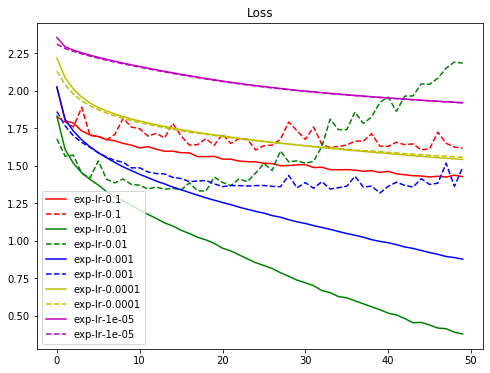

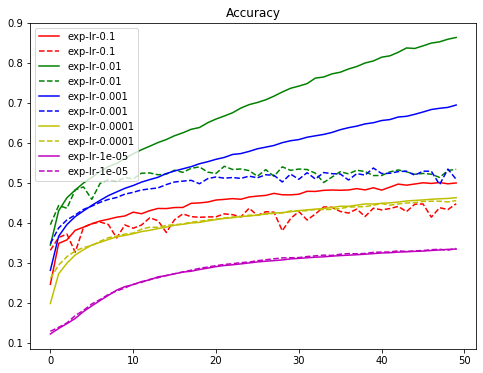

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.8907 - acc: 0.3120 - val_loss: 1.6941 - val_acc: 0.3933
Epoch 2/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6728 - acc: 0.4010 - val_loss: 1.5902 - val_acc: 0.4351
Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5809 - acc: 0.4326 - val_loss: 1.5682 - val_acc: 0.4295
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5366 - acc: 0.4508 - val_loss: 1.5205 - val_acc: 0.4565
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4832 - acc: 0.4698 - val_loss: 1.4671 - val_acc: 0.4755
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4434 - acc: 0.4868 - val_loss: 1.5266 - val_acc: 0.4600
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4107 - acc: 0.4973 - val_loss: 1.4566 - val_ac

50000/50000 [==============================] - 5s 105us/step - loss: 1.8058 - acc: 0.3650 - val_loss: 1.7883 - val_acc: 0.3593
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7370 - acc: 0.3900 - val_loss: 1.7054 - val_acc: 0.4013
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6802 - acc: 0.4108 - val_loss: 1.6594 - val_acc: 0.4105
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6382 - acc: 0.4248 - val_loss: 1.6073 - val_acc: 0.4360
Epoch 6/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5982 - acc: 0.4382 - val_loss: 1.6184 - val_acc: 0.4283
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5626 - acc: 0.4520 - val_loss: 1.5569 - val_acc: 0.4486
Epoch 8/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5330 - acc: 0.4620 - val_loss: 1.5323 - val_acc: 0.4601
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 100us/step - loss: 2.0378 - acc: 0.2977 - val_loss: 2.0045 - val_acc: 0.3118
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9809 - acc: 0.3148 - val_loss: 1.9573 - val_acc: 0.3275
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9395 - acc: 0.3290 - val_loss: 1.9216 - val_acc: 0.3323
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.9064 - acc: 0.3393 - val_loss: 1.8936 - val_acc: 0.3394
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8799 - acc: 0.3469 - val_loss: 1.8695 - val_acc: 0.3481
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8575 - acc: 0.3541 - val_loss: 1.8494 - val_acc: 0.3532
Epoch 9/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8391 - acc: 0.3596 - val_loss: 1.8349 - val_acc: 0.3578
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 100us/step - loss: 2.2438 - acc: 0.1839 - val_loss: 2.2381 - val_acc: 0.1985
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.2292 - acc: 0.2072 - val_loss: 2.2245 - val_acc: 0.2159
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2157 - acc: 0.2212 - val_loss: 2.2117 - val_acc: 0.2283
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.2031 - acc: 0.2337 - val_loss: 2.1997 - val_acc: 0.2392
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.1911 - acc: 0.2434 - val_loss: 2.1879 - val_acc: 0.2492
Epoch 9/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.1794 - acc: 0.2516 - val_loss: 2.1765 - val_acc: 0.2573
Epoch 10/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1680 - acc: 0.2604 - val_loss: 2.1654 - val_acc: 0.2639
Epoch 11/50
50000/50000 [====================

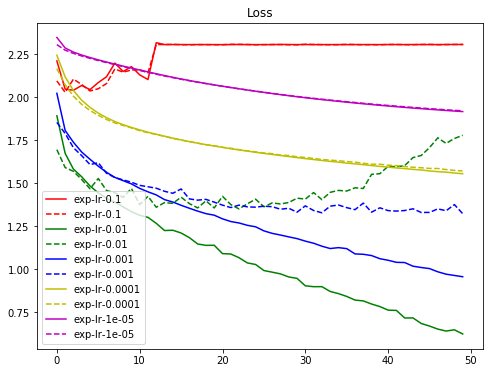

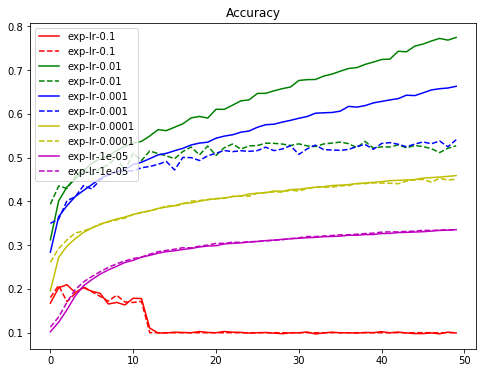

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 1.25

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)              

50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________________________________________

50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Outpu

50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 -

50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 -

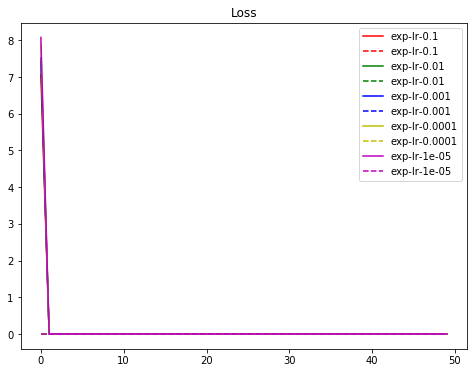

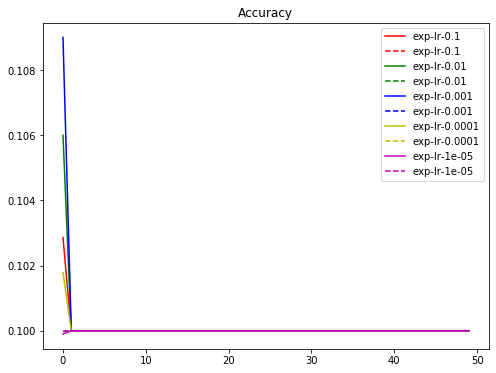

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()